# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('M6.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [6]:
#Colunas que serão utilizadas: APGAR5, GESTACAO, PESO, SEXO
sinasc = df[['APGAR5',
            'GESTACAO',
            'PESO',
            'SEXO']].copy() #Fazer cópia explícita do df para evitar a mensagem de erro

sinasc

,APGAR5,GESTACAO,PESO,SEXO
0,10.0,37 a 41 semanas,3685,Masculino
1,9.0,37 a 41 semanas,3055,Feminino
2,10.0,37 a 41 semanas,3460,Feminino
3,10.0,37 a 41 semanas,2982,Feminino
4,10.0,37 a 41 semanas,3310,Feminino
...,...,...,...,...
27023,9.0,32 a 36 semanas,2110,Masculino
27024,9.0,37 a 41 semanas,3310,Masculino
27025,10.0,37 a 41 semanas,3065,Masculino
27026,9.0,32 a 36 semanas,2352,Masculino


In [7]:
sinasc['APGAR5'].unique()

array([10.,  9.,  7.,  0.,  8.,  4.,  3.,  6.,  5., nan,  2.,  1.])

In [8]:
sinasc['APGAR5'] = sinasc['APGAR5'].replace('nan', np.nan)
sinasc.dropna(inplace=True)
sinasc['APGAR5'].unique()

array([10.,  9.,  7.,  0.,  8.,  4.,  3.,  6.,  5.,  2.,  1.])

In [9]:
sinasc.loc[sinasc['APGAR5'] <= 3, 'APGAR5_CAT'] = 'asfixia severa'
sinasc.loc[(sinasc['APGAR5'] == 4) | (sinasc['APGAR5'] == 5), 'APGAR5_CAT'] = 'asfixia moderada'
sinasc.loc[(sinasc['APGAR5'] == 6) | (sinasc['APGAR5'] == 7), 'APGAR5_CAT'] = 'asfixia leve'
sinasc.loc[(sinasc['APGAR5'] == 8) | (sinasc['APGAR5'] == 9) | (sinasc['APGAR5'] == 10), 'APGAR5_CAT'] = 'normal'
sinasc

,APGAR5,GESTACAO,PESO,SEXO,APGAR5_CAT
0,10.0,37 a 41 semanas,3685,Masculino,normal
1,9.0,37 a 41 semanas,3055,Feminino,normal
2,10.0,37 a 41 semanas,3460,Feminino,normal
3,10.0,37 a 41 semanas,2982,Feminino,normal
4,10.0,37 a 41 semanas,3310,Feminino,normal
...,...,...,...,...,...
27023,9.0,32 a 36 semanas,2110,Masculino,normal
27024,9.0,37 a 41 semanas,3310,Masculino,normal
27025,10.0,37 a 41 semanas,3065,Masculino,normal
27026,9.0,32 a 36 semanas,2352,Masculino,normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

Text(0.5, 1.0, 'Distribuição de APGAR5 por sexo para cada grupo de tempo de gestação')

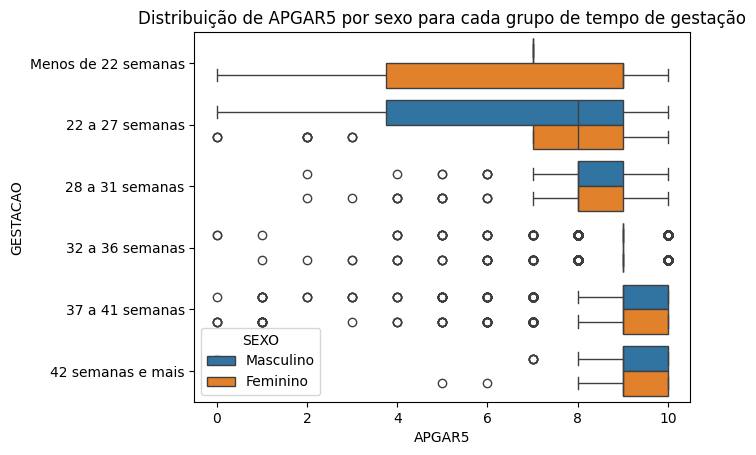

In [28]:
ordem_gestacao = ['Menos de 22 semanas', '22 a 27 semanas', '28 a 31 semanas', '32 a 36 semanas', '37 a 41 semanas', '42 semanas e mais']

ax = sns.boxplot(x='APGAR5', y='GESTACAO', data=sinasc, hue='SEXO', order=ordem_gestacao)
ax.set_title('Distribuição de APGAR5 por sexo para cada grupo de tempo de gestação')

UnboundLocalError: local variable 'boxprops' referenced before assignment

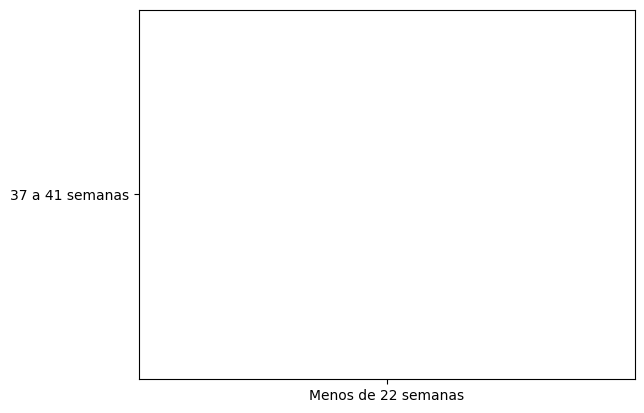

In [40]:
boxprops = dict(edgecolor="black")

ordem_gestacao = ['Menos de 22 semanas', '22 a 27 semanas', '28 a 31 semanas', '32 a 36 semanas', '37 a 41 semanas', '42 semanas e mais']

ax = sns.boxplot(x='APGAR5_CAT', y='GESTACAO', data=sinasc, hue='SEXO', order=ordem_gestacao)
ax.set_title('Distribuição das categorias de APGAR5 por sexo para cada grupo de tempo de gestação')

Text(0.5, 1.0, 'Distribuição das categorias de APGAR5 por sexo para cada grupo de tempo de gestação')

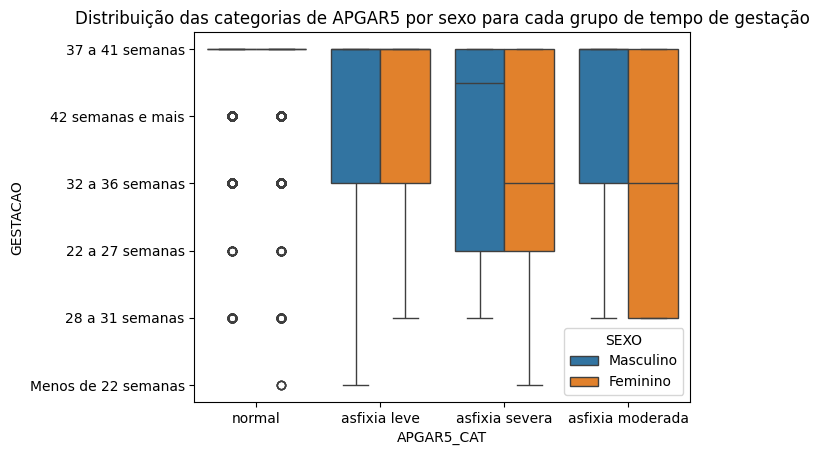

In [31]:
ax = sns.boxplot(x='APGAR5_CAT', y='GESTACAO', data=sinasc, hue='SEXO')
ax.set_title('Distribuição das categorias de APGAR5 por sexo para cada grupo de tempo de gestação')

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [33]:
pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR5'])

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,1,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,44,151,1417,13564,7283
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [36]:
frequencia = pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR5_CAT'])
frequencia.sum(axis=1)

,0
GESTACAO,
22 a 27 semanas,85
28 a 31 semanas,162
32 a 36 semanas,2233
37 a 41 semanas,22520
42 semanas e mais,698
Menos de 22 semanas,7


In [14]:
frequencia_pct=frequencia.div(frequencia.sum(axis=1), axis=0)
frequencia_pct

APGAR5_CAT,asfixia leve,asfixia moderada,asfixia severa,normal
GESTACAO,,,,
22 a 27 semanas,0.141176,0.011765,0.247059,0.600000
28 a 31 semanas,0.111111,0.074074,0.018519,0.796296
32 a 36 semanas,0.032691,0.008509,0.003135,0.955665
37 a 41 semanas,0.008659,0.001243,0.001465,0.988632
42 semanas e mais,0.008596,0.001433,0.001433,0.988539
Menos de 22 semanas,0.142857,0.000000,0.285714,0.571429


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

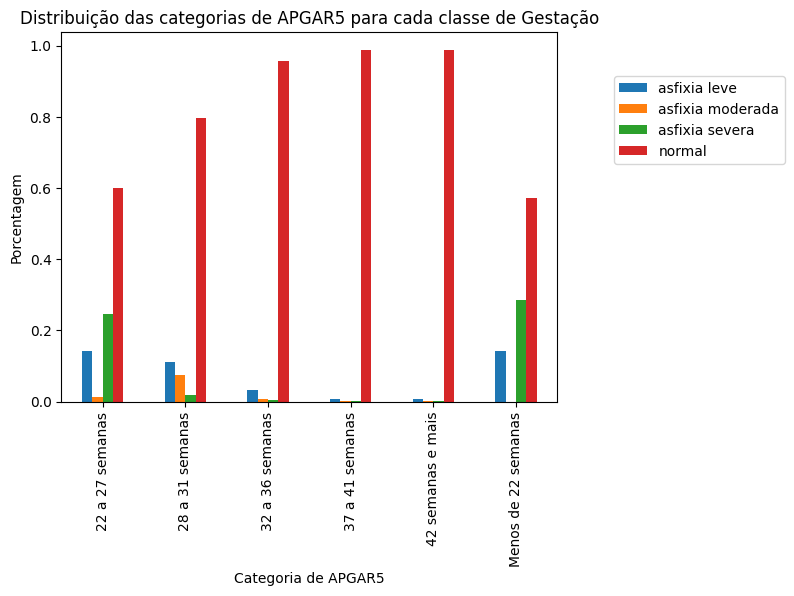

In [48]:
freq = frequencia_pct.plot.bar()
freq.legend(loc="upper left", bbox_to_anchor=(1.1, 0.9))
plt.title('Distribuição das categorias de APGAR5 para cada classe de Gestação')
plt.xlabel('Categoria de APGAR5')
plt.ylabel('Porcentagem')

plt.show()

A análise da distribuição de APGAR5 por tempo de gestação e sexo sugere um ligeiro aumento do risco de complicações respiratórias em recém-nascidos a partir de 37 semanas de gestação. Essa tendência, observada pela redução da categoria "normal" e aumento das categorias de asfixia, requer indicios para corroborar com a afirmação dos médicos.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

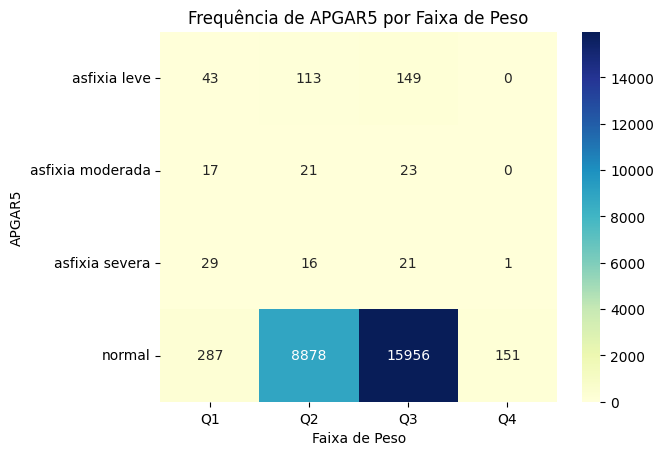

In [27]:
sinasc['PESO_CAT'] = pd.cut(sinasc['PESO'], bins=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

tabela_freq = pd.crosstab(sinasc['APGAR5_CAT'], sinasc['PESO_CAT'])

sns.heatmap(tabela_freq, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Frequência de APGAR5 por Faixa de Peso')
plt.xlabel('Faixa de Peso')
plt.ylabel('APGAR5')
plt.show()

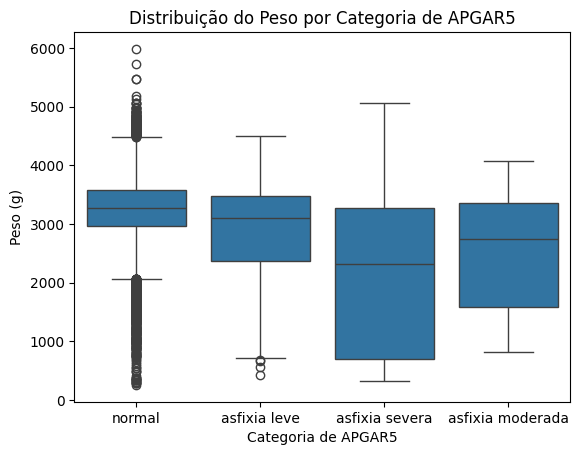

In [17]:
sns.boxplot(data=sinasc, x='APGAR5_CAT', y='PESO')
plt.title('Distribuição do Peso por Categoria de APGAR5')
plt.xlabel('Categoria de APGAR5')
plt.ylabel('Peso (g)')
plt.show()

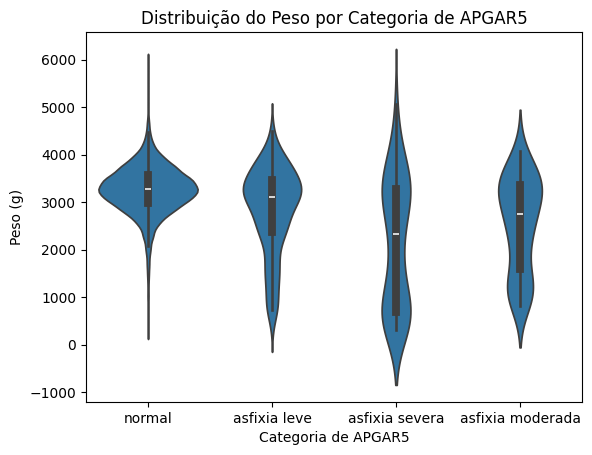

In [18]:
sns.violinplot(data=sinasc, x='APGAR5_CAT', y='PESO')
plt.title('Distribuição do Peso por Categoria de APGAR5')
plt.xlabel('Categoria de APGAR5')
plt.ylabel('Peso (g)')
plt.show()

A análise exploratória revelou concentração de APGAR5 "normal" nos quartis intermediários de peso, sugerindo associação entre extremos de peso e APGAR5. A discretização do peso em quartis foi baseada em critérios matemáticos, não clínicos. A maior frequência de APGAR5 ocorreu na faixa de 3 a 3,5 kg. Embora a análise não seja conclusiva, indica possível associação entre APGAR5 e peso, necessitando de análises estatísticas adicionais para confirmação e quantificação do impacto.